In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Admission_Predict.csv")

df = df.drop("Serial No.", axis=1)

df = df.sample(frac=1, random_state=42) 
train_size = int(0.6 * len(df)) # use 60% of the data for training
train_df = df[:train_size]
test_df = df[train_size:]

In [3]:
X_train = train_df.drop("Chance of Admit ", axis=1).values 
y_train = train_df["Chance of Admit "].values.reshape(-1, 1) 
X_test = test_df.drop("Chance of Admit ", axis=1).values
y_test = test_df["Chance of Admit "].values.reshape(-1, 1)

In [4]:
# Normalize the features using min-max scaling
X_min = X_train.min(axis=0) 
X_max = X_train.max(axis=0)
X_train_norm = (X_train - X_min) / (X_max - X_min) 
X_test_norm = (X_test - X_min) / (X_max - X_min)
# print(X_train_norm)

In [5]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def gradient(X, y_true, y_pred, w, b):
    N = len(X) # number of examples
    dw = -2 / N * np.dot(X.T, (y_true - y_pred)) 
    db = -2 / N * np.sum(y_true - y_pred) 
    return dw, db

def gradient_descent_update(X, y, w, b, alpha):
    y_pred = np.dot(X, w) + b 
    dw, db = gradient(X, y, y_pred, w, b) 
    w = w - alpha * dw 
    b = b - alpha * db
    return w, b

In [6]:
def train_linear_regression(X, y, variant="batch", epochs=1000, alpha=0.1):
    n_features = X.shape[1]
    w = np.random.randn(n_features, 1)
    b = np.random.randn()
    losses = []
    if variant == "batch":
        batch_size = len(X)
    elif variant == "mini-batch":
        batch_size = 10 
    elif variant == "stochastic":
        batch_size = 1 
    else:
        print("Invalid variant name. Please choose from 'batch', 'mini-batch', or 'stochastic'.")
        return None, None, None
    
    for epoch in range(epochs):
        epoch_loss = 0
        for i in range(0, len(X), batch_size):
            X_batch = X[i:i+batch_size]
            y_batch = y[i:i+batch_size]
            w, b = gradient_descent_update(X_batch, y_batch, w, b, alpha)
            y_pred = np.dot(X_batch, w) + b
            batch_loss = mse(y_batch, y_pred)
            epoch_loss += batch_loss * len(X_batch)
        
        epoch_loss /= len(X)
        losses.append(epoch_loss)
        print(f"Epoch {epoch+1}, Loss: {epoch_loss}")
    
    return w, b, losses

In [7]:
w_batch, b_batch, losses_batch = train_linear_regression(X_train_norm, y_train, variant="batch")
w_mini, b_mini, losses_mini = train_linear_regression(X_train_norm, y_train, variant="mini-batch")
w_sto, b_sto, losses_sto = train_linear_regression(X_train_norm, y_train, variant="stochastic")

Epoch 1, Loss: 0.49047161634763636
Epoch 2, Loss: 0.46097921344614123
Epoch 3, Loss: 0.440373087622672
Epoch 4, Loss: 0.4219130508722727
Epoch 5, Loss: 0.40472481287883877
Epoch 6, Loss: 0.3886319930921086
Epoch 7, Loss: 0.373545970979271
Epoch 8, Loss: 0.35939349701652484
Epoch 9, Loss: 0.3461077782373755
Epoch 10, Loss: 0.3336270803837418
Epoch 11, Loss: 0.3218942427197018
Epoch 12, Loss: 0.3108563244492777
Epoch 13, Loss: 0.3004642888006446
Epoch 14, Loss: 0.290672712038656
Epoch 15, Loss: 0.28143951437121734
Epoch 16, Loss: 0.2727257109744173
Epoch 17, Loss: 0.2644951816158953
Epoch 18, Loss: 0.2567144574840181
Epoch 19, Loss: 0.24935252393627308
Epoch 20, Loss: 0.24238063797671458
Epoch 21, Loss: 0.23577215936133247
Epoch 22, Loss: 0.22950239431256902
Epoch 23, Loss: 0.22354845090040262
Epoch 24, Loss: 0.2178891052179101
Epoch 25, Loss: 0.21250467754443886
Epoch 26, Loss: 0.207376917749863
Epoch 27, Loss: 0.20248889924922517
Epoch 28, Loss: 0.19782492086871892
Epoch 29, Loss: 0.19

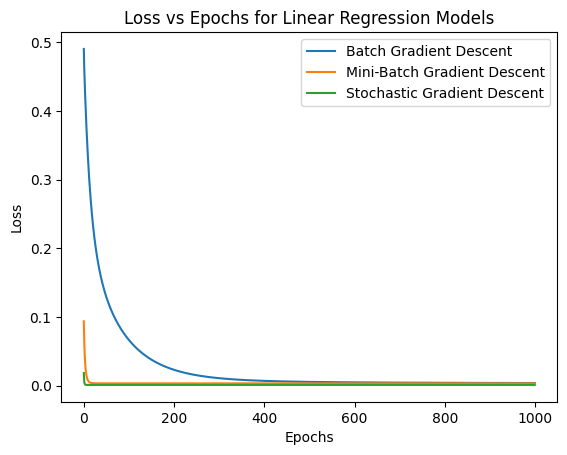

In [8]:
# Plot the loss-vs-iterations for each model
plt.plot(losses_batch, label="Batch Gradient Descent")
plt.plot(losses_mini, label="Mini-Batch Gradient Descent")
plt.plot(losses_sto, label="Stochastic Gradient Descent")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs for Linear Regression Models")
plt.legend()
plt.show()

In [9]:
y_pred_batch = np.dot(X_test_norm, w_batch) + b_batch 
mse_batch = mse(y_test, y_pred_batch) 
print(f"MSE for Batch Gradient Descent: {mse_batch}")

y_pred_mini = np.dot(X_test_norm, w_mini) + b_mini 
mse_mini = mse(y_test, y_pred_mini)
print(f"MSE for Mini-Batch Gradient Descent: {mse_mini}")

y_pred_sto = np.dot(X_test_norm, w_sto) + b_sto 
mse_sto = mse(y_test, y_pred_sto) 
print(f"MSE for Stochastic Gradient Descent: {mse_sto}")

MSE for Batch Gradient Descent: 0.003604974262008215
MSE for Mini-Batch Gradient Descent: 0.003554347259516263
MSE for Stochastic Gradient Descent: 0.005155965698166085


In [10]:
y_pred = y_pred_batch 
y_true = y_test 
correct = (y_pred > 0.5) == (y_true > 0.5) 
results = pd.DataFrame({"Prediction": y_pred.flatten(), "Actual": y_true.flatten(), "Correct": correct.flatten()}) 
print(results)

     Prediction  Actual  Correct
0      0.781698    0.73     True
1      0.593803    0.64     True
2      0.852082    0.84     True
3      0.847671    0.81     True
4      0.695451    0.76     True
..          ...     ...      ...
195    0.870605    0.87     True
196    0.635213    0.72     True
197    0.481492    0.57    False
198    0.602984    0.55     True
199    0.667799    0.62     True

[200 rows x 3 columns]


In [11]:
intercept = b_batch 
coefficients = w_batch.flatten() 
features = train_df.drop("Chance of Admit ", axis=1).columns 
equation = f"Chance of Admit = {intercept:.2f}" 
for coefficient, feature in zip(coefficients, features): 
    equation += f" + {coefficient:.2f} * {feature}" 
print(equation)

Chance of Admit = 0.39 + 0.21 * GRE Score + 0.04 * TOEFL Score + 0.03 * University Rating + 0.03 * SOP + 0.08 * LOR  + 0.20 * CGPA + 0.03 * Research


In [12]:
coefficient_feature_pairs = list(zip(coefficients, features)) 
coefficient_feature_pairs.sort(key=lambda x: abs(x[0]), reverse=True) 
ranking = pd.DataFrame(coefficient_feature_pairs, columns=["Coefficient", "Feature"]) 
ranking.index += 1
print(ranking)

   Coefficient            Feature
1     0.209013          GRE Score
2     0.199198               CGPA
3     0.083502               LOR 
4     0.036448        TOEFL Score
5     0.029739                SOP
6     0.029377  University Rating
7     0.025953           Research


In [13]:
def gaussian_rbf(x, c, w):
    return np.exp(-w * (x - c)**2)

In [14]:
X_train_rbf = gaussian_rbf(X_train_norm, -0.9, 0.2)
X_test_rbf = gaussian_rbf(X_test_norm, -0.9, 0.2)

In [15]:
w_batch_rbf, b_batch_rbf, losses_batch_rbf = train_linear_regression(X_train_rbf, y_train, variant="batch")
w_mini_rbf, b_mini_rbf, losses_mini_rbf = train_linear_regression(X_train_rbf, y_train, variant="mini-batch")
w_sto_rbf, b_sto_rbf, losses_sto_rbf = train_linear_regression(X_train_rbf, y_train, variant="stochastic")

Epoch 1, Loss: 0.8565257648466843
Epoch 2, Loss: 0.4353520978095842
Epoch 3, Loss: 0.4174669387561218
Epoch 4, Loss: 0.4135821683288371
Epoch 5, Loss: 0.41021234015314434
Epoch 6, Loss: 0.40689002843920596
Epoch 7, Loss: 0.40359876169849995
Epoch 8, Loss: 0.4003376924098107
Epoch 9, Loss: 0.39710651690412285
Epoch 10, Loss: 0.39390495295585376
Epoch 11, Loss: 0.3907327216615326
Epoch 12, Loss: 0.38758954678751795
Epoch 13, Loss: 0.38447515472309046
Epoch 14, Loss: 0.3813892744547426
Epoch 15, Loss: 0.3783316375414357
Epoch 16, Loss: 0.37530197809011717
Epoch 17, Loss: 0.37230003273147066
Epoch 18, Loss: 0.3693255405958978
Epoch 19, Loss: 0.3663782432897285
Epoch 20, Loss: 0.3634578848716593
Epoch 21, Loss: 0.36056421182941356
Epoch 22, Loss: 0.35769697305662645
Epoch 23, Loss: 0.3548559198299485
Epoch 24, Loss: 0.3520408057863683
Epoch 25, Loss: 0.3492513869007503
Epoch 26, Loss: 0.3464874214635871
Epoch 27, Loss: 0.3437486700589641
Epoch 28, Loss: 0.341034895542733
Epoch 29, Loss: 0.3

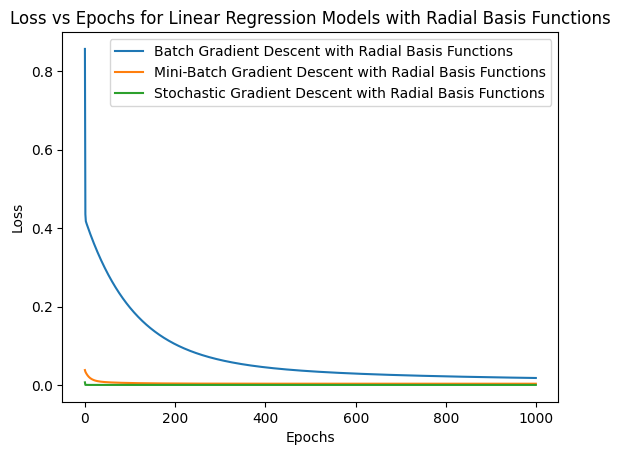

In [16]:
plt.plot(losses_batch_rbf, label="Batch Gradient Descent with Radial Basis Functions")
plt.plot(losses_mini_rbf, label="Mini-Batch Gradient Descent with Radial Basis Functions")
plt.plot(losses_sto_rbf, label="Stochastic Gradient Descent with Radial Basis Functions")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs for Linear Regression Models with Radial Basis Functions")
plt.legend()
plt.show()

In [17]:
y_pred_batch_rbf = np.dot(X_test_rbf, w_batch_rbf) + b_batch_rbf 
mse_batch_rbf = mse(y_test, y_pred_batch_rbf) 
print(f"MSE for Batch Gradient Descent with Radial Basis Functions: {mse_batch_rbf}")

y_pred_mini_rbf = np.dot(X_test_rbf, w_mini_rbf) + b_mini_rbf 
mse_mini_rbf = mse(y_test, y_pred_mini_rbf) 
print(f"MSE for Mini-Batch Gradient Descent with Radial Basis Functions: {mse_mini_rbf}")

y_pred_sto_rbf = np.dot(X_test_rbf, w_sto_rbf) + b_sto_rbf 
mse_sto_rbf = mse(y_test, y_pred_sto_rbf)
print(f"MSE for Stochastic Gradient Descent with Radial Basis Functions: {mse_sto_rbf}")

MSE for Batch Gradient Descent with Radial Basis Functions: 0.024230402468028177
MSE for Mini-Batch Gradient Descent with Radial Basis Functions: 0.003633098126201184
MSE for Stochastic Gradient Descent with Radial Basis Functions: 0.005387051276612246
